## Loading modules & data

In [13]:
#! pip install mne

In [58]:
# importing modules
import numpy as np
import mne
import helper_functions as hf
import matplotlib.pyplot as plt
from mne.stats import permutation_cluster_test
from mne.time_frequency import tfr_morlet

# Time-frequency analysis

#### Reading in epochs
The epochs saved in the `ICA.ipynb` is loaded in for analysis. The data has been cleaned using ICA, time-locked to the reaction time and downsampled to 250 Hz.

In [15]:
epochs = mne.read_epochs('Stroop_mouse_EEG_data/epochs/epochs_RT_epo.fif')

Reading /Users/laurapaulsen/Desktop/Neuro-exam/EGG_and_mouse_tracking/Stroop_mouse_EEG_data/epochs/epochs_RT_epo.fif ...
    Found the data of interest:
        t =    -700.00 ...     696.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
148 matching events found
No baseline correction applied
0 projection items activated


Not setting metadata
Not setting metadata
148 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


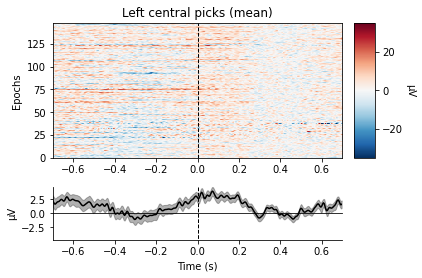

[<Figure size 432x288 with 3 Axes>]

In [59]:
leftcentralpicks = [5, 6, 10]
mne.viz.plot_epochs_image(epochs, group_by={'Left central picks' : leftcentralpicks}, combine = 'mean', cmap = 'interactive', vmin=-35, vmax=35)

Now lets look into what causes these deflections. This is done by making a time-frequency analysis of the epochs. 

#### Time-Frequency analysis

In [17]:
#freqs = np.logspace(*np.log10([6, 35]), num=12)
freqs = np.arange(0.7, 16.5, 0.5)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc =  mne.time_frequency.tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

Applying baseline correction (mode: logratio)


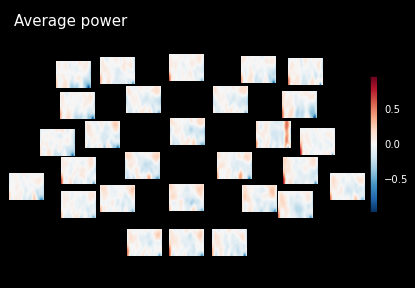

In [18]:
power.plot_topo(baseline=(-0.5, 0), mode='logratio', title='Average power');
#power.plot([82], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[82])

#### Plotting Alpha waves

Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)


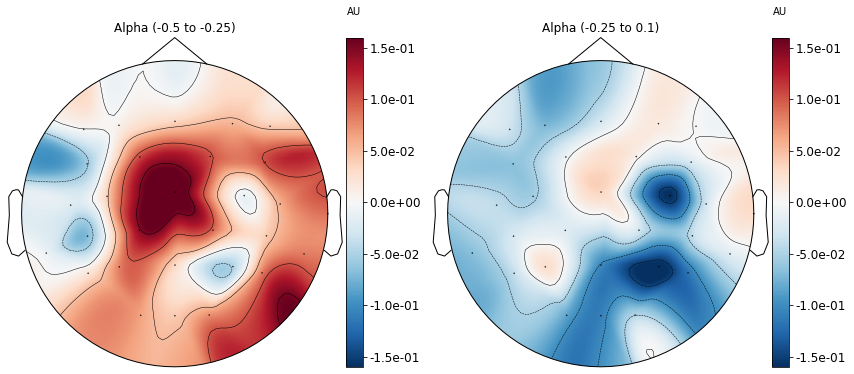

In [34]:
fig, axis = plt.subplots(1, 2, figsize=(12, 12))

baseline = (0.3, 0.5)
power.plot_topomap(ch_type='eeg', tmin=-0.5, tmax=-0.25, fmin=8, fmax=12,
                   baseline=baseline, mode='logratio', axes=axis[0],
                   title='Alpha (-0.5 to -0.25)', show=False, vmin = -.16, vmax = .16)

power.plot_topomap(ch_type='eeg', tmin=-0.25, tmax=0.1, fmin=8, fmax=12,
                   baseline=baseline, mode='logratio', axes=axis[1],
                   title='Alpha (-0.25 to 0.1)', show=False, vmin = -.16, vmax = .16)

mne.viz.tight_layout()
plt.show()

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


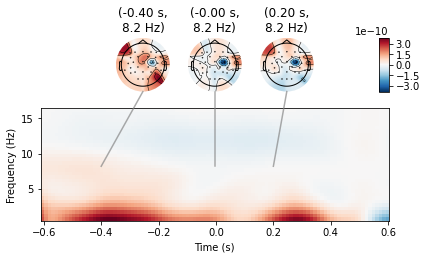

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


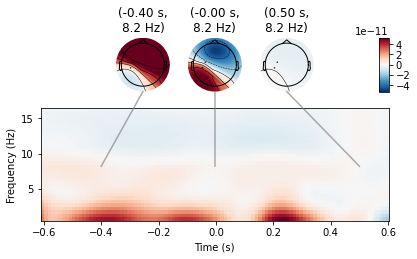

In [20]:
leftcentralpicks = [5, 6, 10]
leftmotorpicks = [10, 15] #(LM, C3, C5, CP3, CP5) 
leftpremotor = [5] #Left Premotor (LPM: FC3, FC5),


power.plot_joint(mode='mean', baseline = (0.4, 0.6), tmin = -.6, tmax = .6, timefreqs=[(0, 8), (0.2, 8), (-0.4, 8)]);
#power.plot_joint(mode='mean', picks = leftcentralpicks, baseline = (0.4, 0.6), tmin = -.6, tmax = .6, timefreqs=[(0, 8), (0.5, 8), (-0.4, 8)]);
power.plot_joint(mode='mean', picks = leftmotorpicks, baseline = (0.4, 0.6), tmin = -.6, tmax = .6, timefreqs=[(0, 8), (0.5, 8), (-0.4, 8)]);
#power.plot_joint(mode='mean', picks = leftpremotor, baseline = (0.4, 0.6), tmin = -.6, tmax = .6, timefreqs=[(0, 8), (0.5, 8), (-0.4, 8)]);


We see that the alpha waves are reduced just before and while the action is done and then rebounds afterwards. alpha waves "locks" a given network in a dominating rhythm, and when this rhythm is supressed it opens up for other processing in the given area (i.e, initiating a motor action).


**Note:**
* Widespread suppression of low-beta (12-18 Hz) - initiation of movement

#### Contrasting across conditions
How to understand this? higher inhibition of motor reponse??? Super interesting if that is the case.


**Link to code:**
https://berdakh.github.io/blog/eeg/jupyter/2020/09/14/MNE-Tutorial-part-2.html#Time-Frequency-stuff

In [21]:
freqs = np.logspace(*np.log10([6, 35]), num=12)
n_cycles = freqs / 2.  # different number of cycle per frequency
power_inc, itc_inc =  mne.time_frequency.tfr_morlet(epochs['cInc'], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, n_jobs=1)
power_con, itc_con =  mne.time_frequency.tfr_morlet(epochs['cCon'], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, n_jobs=1)
power_neu, itc_neu =  mne.time_frequency.tfr_morlet(epochs['cNeu'], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, n_jobs=1)
power_all, itc_all =  mne.time_frequency.tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, n_jobs=1)


tfr_contrast = mne.combine_evoked((power_inc, power_con), (1, -1)) #subtraction by passing a negative weight
tfr_contrast.apply_baseline(baseline)

Applying baseline correction (mode: mean)


<AverageTFR | time : [-0.700000, 0.696000], freq : [6.000000, 35.000000], nave : 24, channels : 28, ~965 kB>

No baseline correction applied


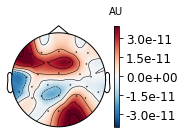

In [22]:
mne.viz.plot_tfr_topomap(tfr_contrast);

#### Comparison of mean power in the conditions

CHECK THAT THESE ARE THE RIGHT FREQUENCIES (alpha)

In [42]:
freq_ind_b = 0
freq_ind_a = 9
time_ind_b = 70
time_ind_a = 300


## averaging over alpha frequencies
average_con = hf.average_power_time(power_con, leftcentralpicks, freq_ind_b, freq_ind_a, time_ind_b, time_ind_a)
average_inc = hf.average_power_time(power_inc, leftcentralpicks, freq_ind_b, freq_ind_a, time_ind_b, time_ind_a)
average_neu = hf.average_power_time(power_neu, leftcentralpicks, freq_ind_b, freq_ind_a, time_ind_b, time_ind_a)


In [43]:
times = power_con.times[time_ind_b:time_ind_a]

Text(0.5, 1.0, 'Average Alpha Power')

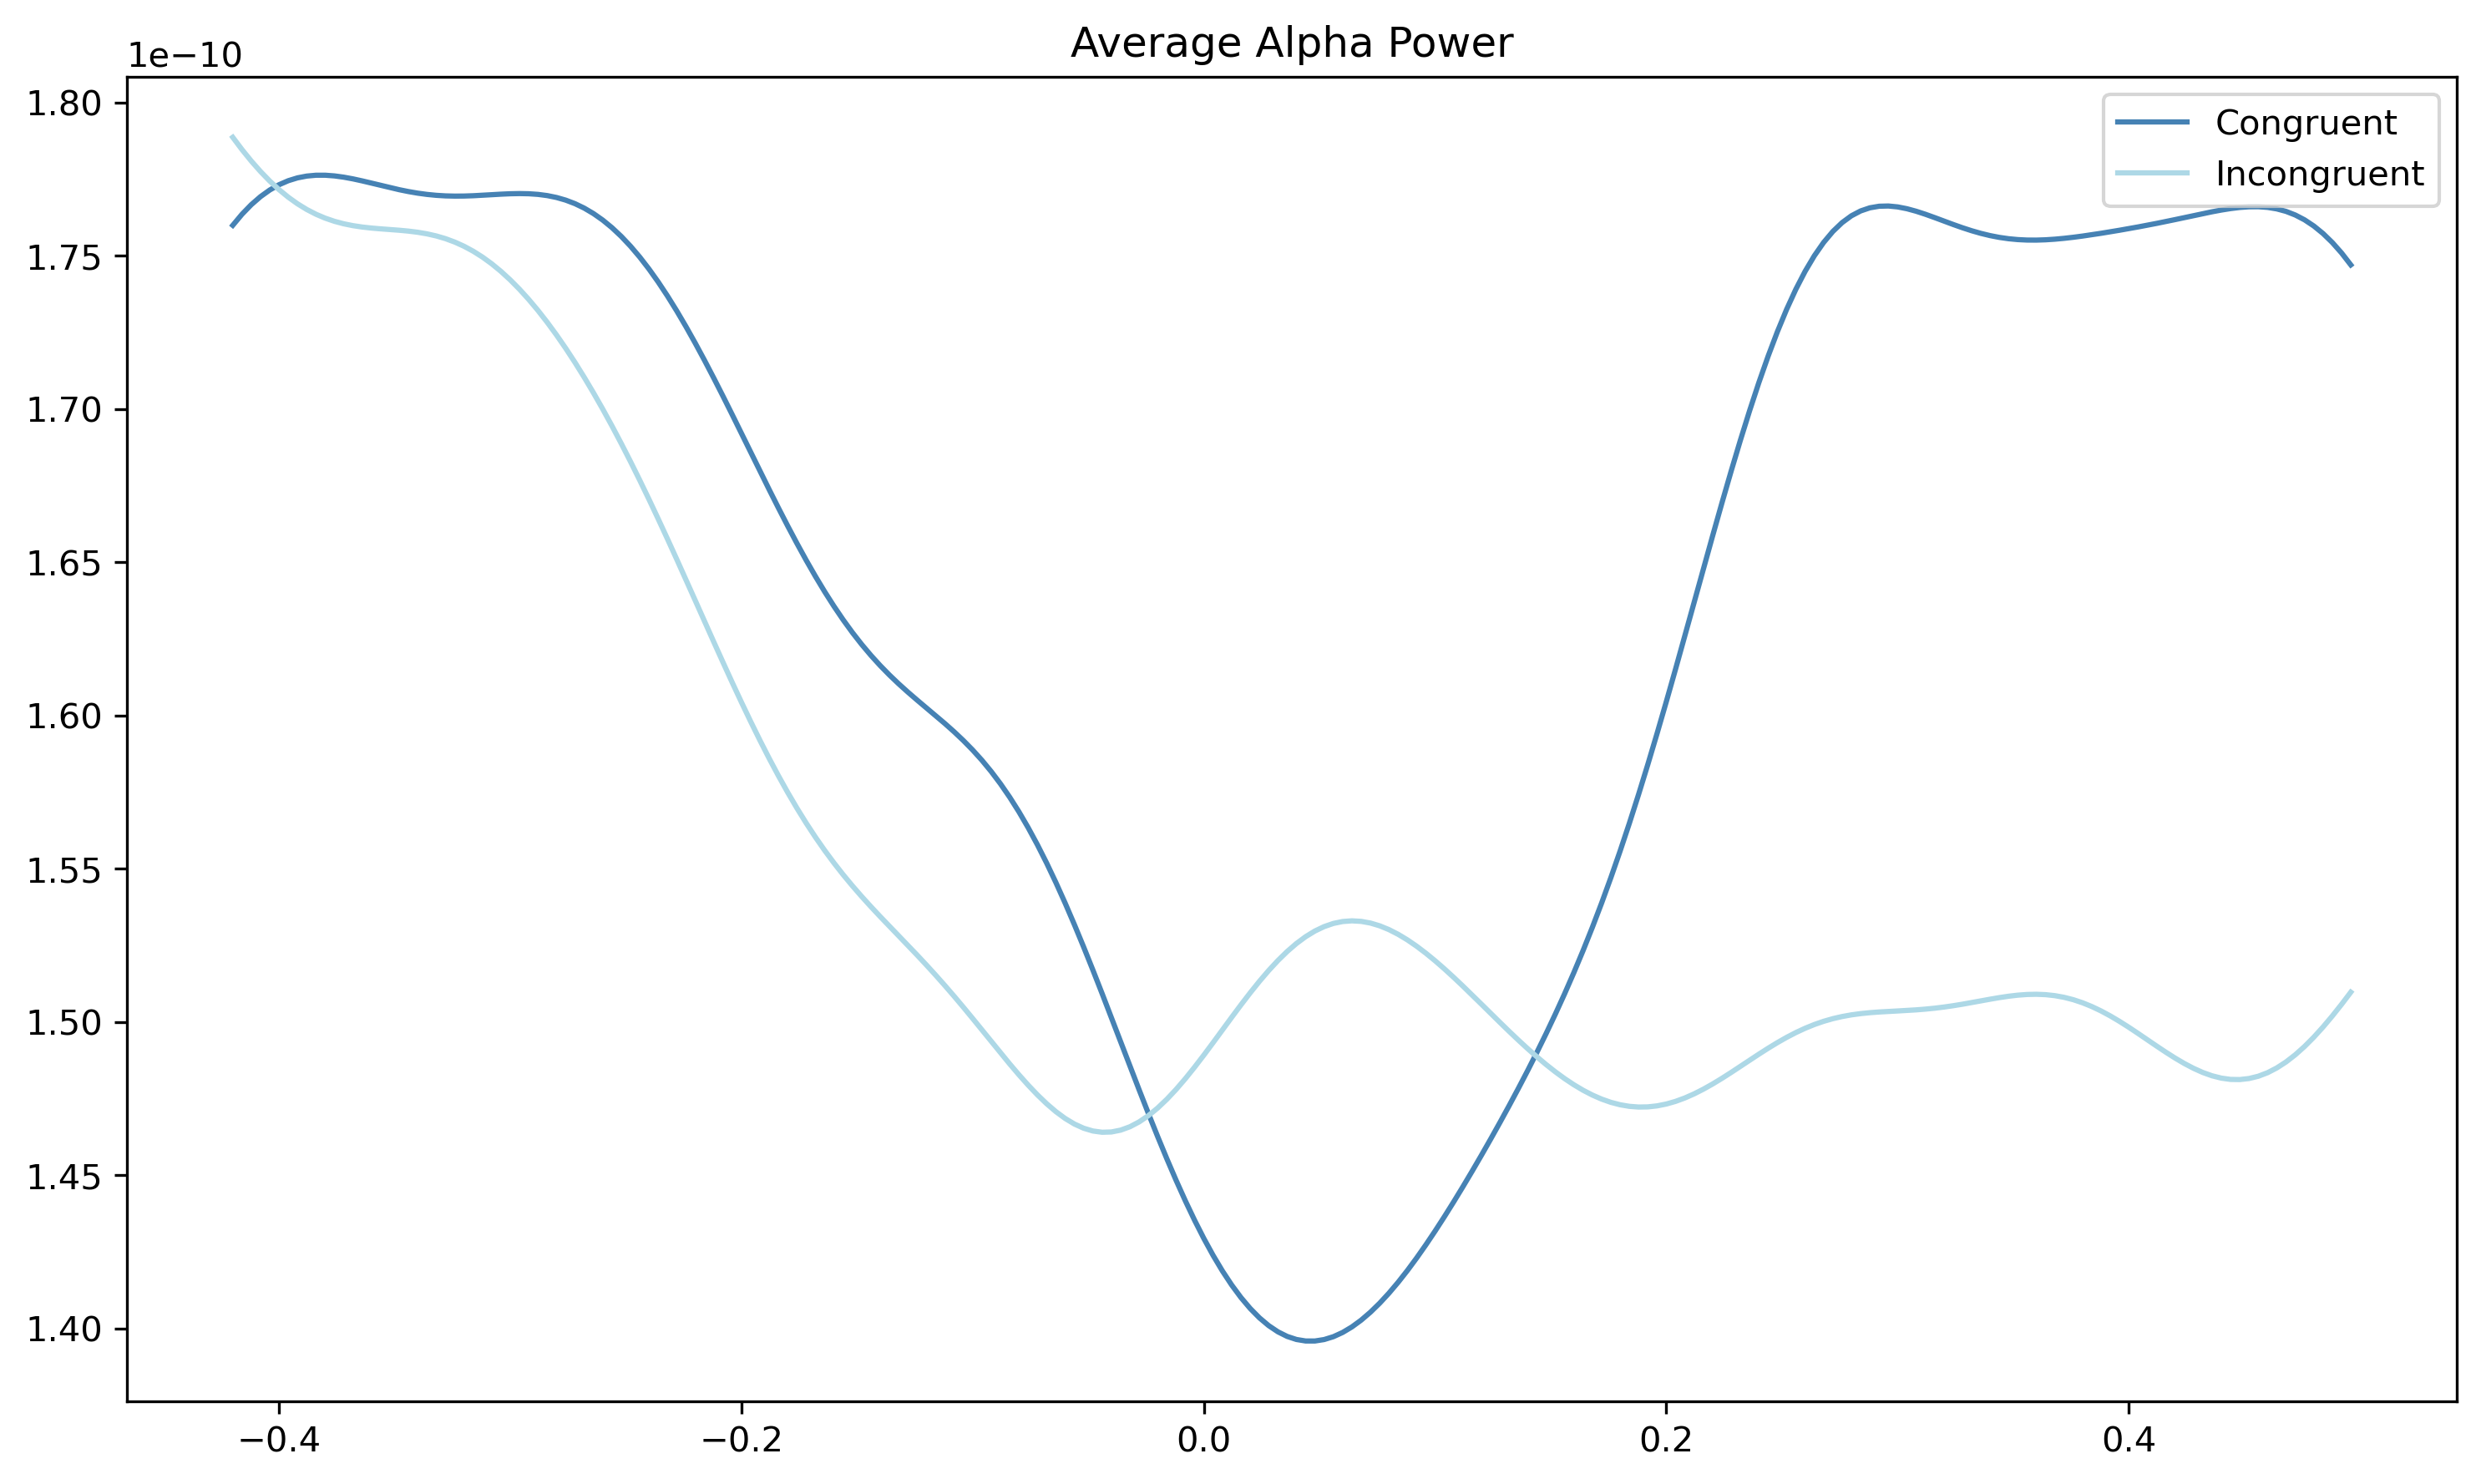

In [51]:
fig, axis = plt.subplots(1, 1, figsize=(12, 7), dpi=300)
plt.plot(times, average_con, 'steelblue', label = 'Congruent')
plt.plot(times, average_inc, 'lightblue', label = 'Incongruent')
#plt.plot(times, average_neu,'g', label = 'Neutral')
plt.legend(loc = 'upper right')
plt.title('Average Alpha Power')

## Cluster-based permutation test on tfr

https://mne.tools/stable/generated/mne.stats.permutation_cluster_test.html#examples-using-mne-stats-permutation-cluster-test

To begin with 

In [26]:
ch_name = ['Cz', 'C3']#[C3, Cz, C4]
baseline = (0.3, 0.5)

In [27]:
tmin, tmax = -0.3, 0.5
epochs_con = epochs['cCon']
epochs_congruent = epochs_con.copy().pick_channels(ch_name)
epochs_congruent.crop(tmin, tmax)

epochs_inc = epochs['cInc']
epochs_incongruent = epochs_inc.copy().pick_channels(ch_name)
epochs_incongruent.crop(tmin, tmax)


epochs_neu = epochs['cNeu']
epochs_neutral = epochs_neu.copy().pick_channels(ch_name)
epochs_neutral.crop(tmin, tmax)

Number of events,49
Events,cNeu: 49
Time range,-0.300 – 0.500 sec
Baseline,0.300 – 0.500 sec


In [28]:
freqs = np.arange(7.5, 40, 0.5) 
n_cycles = freqs / 2.  # different number of cycle per frequency
tfr_inc = tfr_morlet(epochs_incongruent, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                     return_itc=False, n_jobs=1, average=False)
tfr_con = tfr_morlet(epochs_congruent, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                     return_itc=False, n_jobs=1, average=False)
tfr_neu = tfr_morlet(epochs_neutral, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                     return_itc=False, n_jobs=1, average=False)
tfr_all = tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                     return_itc=False, n_jobs=1, average=False)

Not setting metadata
Not setting metadata
Not setting metadata
Not setting metadata


In [29]:
tfr_con.apply_baseline(baseline)
tfr_neu.apply_baseline(baseline)
tfr_inc.apply_baseline(baseline)

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


<EpochsTFR | time : [-0.300000, 0.500000], freq : [7.500000, 39.500000], epochs : 50, channels : 2, ~10.0 MB>

In [30]:
data_con = tfr_con.data[:, 0, :, :] # we only have one channel CAN I TAKE THE MEAN OVER A FEW CHANNELS?
data_neu = tfr_neu.data[:, 0, :, :] # we only have one channel
data_inc = tfr_inc.data[:, 0, :, :] # we only have one channel

In [31]:
threshold = 5
F_obs, clusters, cluster_p_values, H0 = \
    permutation_cluster_test([data_con, data_inc], out_type='mask',
                             n_permutations=100, threshold=threshold, tail=0)

stat_fun(H1): min=0.000000 max=8.832802
Running initial clustering
Found 8 clusters
Permuting 99 times...


100%|██████████|  : 99/99 [00:00<00:00,  158.13it/s]


Computing cluster p-values
Done.


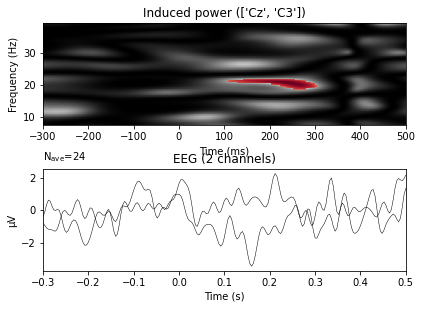

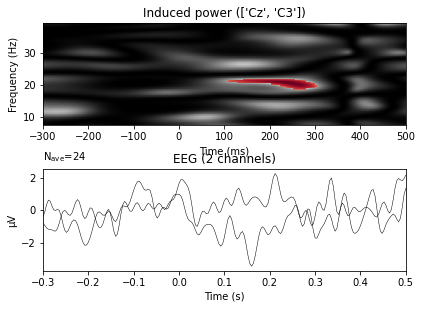

In [32]:
times = 1e3 * epochs_congruent.times  # change unit to ms

fig, (ax, ax2) = plt.subplots(2, 1, figsize=(6, 4))
fig.subplots_adjust(0.12, 0.08, 0.96, 0.94, 0.2, 0.43)

# Compute the difference in evoked to determine which was greater since
# we used a 1-way ANOVA which tested for a difference in population means
evoked_power_1 = data_con.mean(axis=0)
evoked_power_2 = data_inc.mean(axis=0)
evoked_power_contrast = evoked_power_1 - evoked_power_2
signs = np.sign(evoked_power_contrast)

# Create new stats image with only significant clusters
F_obs_plot = np.nan * np.ones_like(F_obs)
for c, p_val in zip(clusters, cluster_p_values):
    if p_val <= 0.5:
        F_obs_plot[c] = F_obs[c] * signs[c]

ax.imshow(F_obs,
          extent=[times[0], times[-1], freqs[0], freqs[-1]],
          aspect='auto', origin='lower', cmap='gray')
max_F = np.nanmax(abs(F_obs_plot))
ax.imshow(F_obs_plot,
          extent=[times[0], times[-1], freqs[0], freqs[-1]],
          aspect='auto', origin='lower', cmap='RdBu_r',
          vmin=-max_F, vmax=max_F)

ax.set_xlabel('Time (ms)')
ax.set_ylabel('Frequency (Hz)')
ax.set_title(f'Induced power ({ch_name})')

# plot evoked
evoked_condition_1 = epochs_congruent.average()
evoked_condition_2 = epochs_incongruent.average()
evoked_contrast = mne.combine_evoked([evoked_condition_1, evoked_condition_2],
                                     weights=[1, -1])
evoked_contrast.plot(axes=ax2, time_unit='s')

# Random shizzle

In [56]:
epochs.ch_names
#'FC5',
#'FC1',
#'C3',




['F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'FC5',
 'FC1',
 'FC2',
 'FC6',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'TP9',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'TP10',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'O1',
 'Oz',
 'O2']